<a href="https://colab.research.google.com/github/Jalicia-Harris/2-Proposed-Dateset-Options/blob/main/Prescribed_Drugs_for_Cirrhosis_Predictions_Jalicia_Harris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Packages

# Prescribed Drugs for Cirrhosis Predictions

##### Jalicia Harris

###Data Dictionary:

1. ID: unique identifier
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4. Drug: type of drug D-penicillamine or placebo
5. Age: age in [days]
6. Sex: M (male) or F (female)
7. Ascites: presence of ascites N (No) or Y (Yes)
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9. Spiders: presence of spiders N (No) or Y (Yes)
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11. Bilirubin: serum bilirubin in [mg/dl]
12. Cholesterol: serum cholesterol in [mg/dl]
13. Albumin: albumin in [gm/dl]
14. Copper: urine copper in [ug/day]
15. Alk_Phos: alkaline phosphatase in [U/liter]
16. SGOT: SGOT in [U/ml]
17. Triglycerides: triglicerides in [mg/dl]
18. Platelets: platelets per cubic [ml/1000]
19. Prothrombin: prothrombin time in seconds [s]
20. Stage: histologic stage of disease (1, 2, 3, or 4)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

In [2]:
# Load and Display Data
df = pd.read_csv('/content/drive/MyDrive/Data/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
# Display column info and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

### Display Number of Rows and Columns

In [4]:
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 418 rows and 20 columns


## Clean the Dataset

### Remove Unnecessary Columns

- The 'ID' column will not be useful for making predictions, so the column will be dropped.
- The 'Age' column contains way too many impossible values, so this will also be dropped. 

In [5]:
# Remove unnecessary columns
df.drop(columns=['ID', 'Age'], inplace=True)
# Display columns to confirm change
df.columns

Index(['N_Days', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

### Remove Unnecessary Rows

#### Identify Any Duplicates

In [6]:
# Display number of duplicates
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#### Identify Any Missing Values

In [7]:
# Display total number of missing values
print(f'There are {df.isna().sum().sum()} missing values')

There are 1033 missing values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Sex            418 non-null    object 
 4   Ascites        312 non-null    object 
 5   Hepatomegaly   312 non-null    object 
 6   Spiders        312 non-null    object 
 7   Edema          418 non-null    object 
 8   Bilirubin      418 non-null    float64
 9   Cholesterol    284 non-null    float64
 10  Albumin        418 non-null    float64
 11  Copper         310 non-null    float64
 12  Alk_Phos       312 non-null    float64
 13  SGOT           312 non-null    float64
 14  Tryglicerides  282 non-null    float64
 15  Platelets      407 non-null    float64
 16  Prothrombin    416 non-null    float64
 17  Stage          412 non-null    float64
dtypes: float64

In [9]:
# Check for missing values
df.isna().sum()

N_Days             0
Status             0
Drug             106
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

- All missing values in categorical columns ('Drug', 'Ascites', 'Hepatomegaly', 'Spiders') will be filled in with 'Unknown' since there is no way of knowing what they are.
- All missing values in numeric columns ('Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage') will be filled with the average of each column. Dropping these columns would cause a lot of useful data to be removed.

### Correct All Missing Values

#### Categorical Columns

In [10]:
# Replace missing categorical values with 'Unknown'
df['Drug'].fillna('Unknown', inplace=True)
df['Ascites'].fillna('Unknown', inplace=True)
df['Hepatomegaly'].fillna('Unknown', inplace=True)
df['Spiders'].fillna('Unknown', inplace=True)

#### Numeric Columns

In [13]:
# Replace missing numeric missing values with the mean
df['Cholesterol'].fillna(df['Cholesterol'].mean(), inplace=True)
df['Copper'].fillna(df['Copper'].mean(), inplace=True)
df['Alk_Phos'].fillna(df['Alk_Phos'].mean(), inplace=True)
df['SGOT'].fillna(df['SGOT'].mean(), inplace=True)
df['Tryglicerides'].fillna(df['Tryglicerides'].mean(), inplace=True)
df['Platelets'].fillna(df['Platelets'].mean(), inplace=True)
df['Prothrombin'].fillna(df['Prothrombin'].mean(), inplace=True)
df['Stage'].fillna(df['Stage'].mean(), inplace=True)

In [14]:
# Confirm Results
df.isna().sum()

N_Days           0
Status           0
Drug             0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### Identify Any Inconsistencies

#### Categorical Columns

In [15]:
# Check and address any inconsistent values in categorical columns.
df.describe(include='object')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,418,418,418,418,418,418
unique,3,3,2,3,3,3,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


- There are no inconsistencies in the categorical columns

#### Numeric Columns

In [17]:
# Check and address any inconsistencies in the numeric columns
df.describe(include='number').round(2)

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00
mean,1917.78,3.22,369.51,3.50,97.65,1982.66,122.56,124.70,257.02,10.73,3.02
std,1104.67,4.41,191.08,0.42,73.70,1848.44,48.97,53.48,97.02,1.02,0.88
min,41.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1092.75,0.80,273.00,3.24,51.25,1016.25,91.00,95.00,190.00,10.00,2.00
50%,1730.00,1.40,369.51,3.53,97.65,1717.00,122.56,124.70,253.00,10.60,3.00
75%,2613.50,3.40,369.51,3.77,100.75,1982.66,135.75,127.75,315.50,11.10,4.00
max,4795.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,721.00,18.00,4.00


- There are no impossible values in numeric columns

## Explore Data Using Visualizations

### Create Univariate Visuals for the Target and All Features

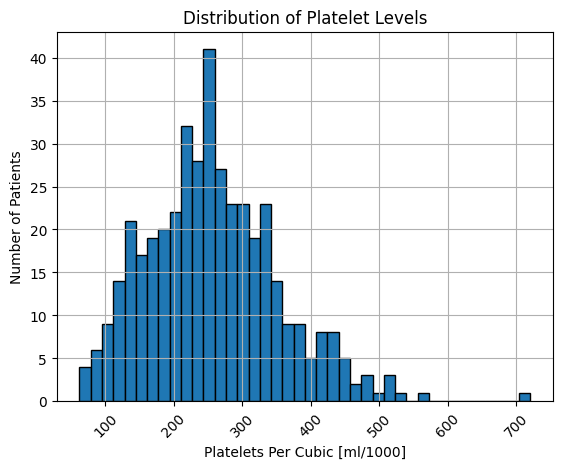

In [24]:
# Histogram to view the distributions of the 'Drug' column
ax = df['Platelets'].hist(bins=40, edgecolor = 'black')
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of Platelet Levels')
ax.set_xlabel('Platelets Per Cubic [ml/1000]')
ax.set_ylabel('Number of Patients');

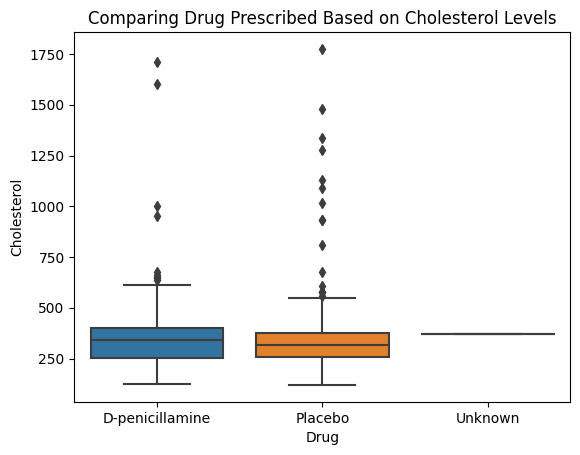

In [28]:
# Create a Boxplot to view statistical summaries of various features in the dataset
ax = sns.boxplot(x='Drug', y='Cholesterol', data=df)
ax.set_title("Comparing Drug Prescribed Based on Cholesterol Levels");

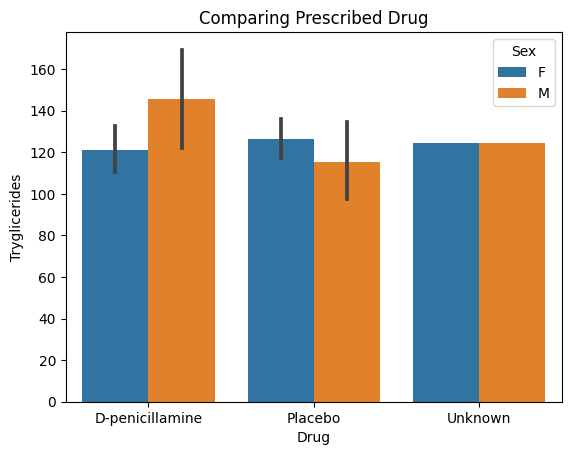

In [32]:
# Using seaborn to plot the means
ax = sns.barplot(data=df, x='Drug', y='Tryglicerides', hue='Sex');
ax.set_title("Comparing Prescribed Drug");